# 1. List of ML algorithms mostly used in algorithmic trading

1. Linear Regression
2. Logistic Regression
3. Random Forests 
<!-- 4. k-nearest nieghbor (KNN)
5. Classification and Regression Tree (CART) -->


In [1]:
# Dependencies
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
import talib as ta

In [2]:
# Download the historical data
reliance = pd.DataFrame(yf.download("RELIANCE.NS", interval="1d", period="5y"))

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
# Get information
reliance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1239 entries, 2020-03-30 to 2025-03-28
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, RELIANCE.NS)   1239 non-null   float64
 1   (High, RELIANCE.NS)    1239 non-null   float64
 2   (Low, RELIANCE.NS)     1239 non-null   float64
 3   (Open, RELIANCE.NS)    1239 non-null   float64
 4   (Volume, RELIANCE.NS)  1239 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.1 KB


In [4]:
# Describe the data to see mean, median, mode, etc.
reliance.describe()

Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
count,1239.000000,1239.000000,1239.000000,1239.000000,1.239000e+03
mean,1133.154263,1145.123137,1122.104118,1133.951300,1.870635e+07
std,205.565273,205.914826,205.277590,205.625102,1.561729e+07
min,459.304504,479.072719,454.646619,463.828704,0.000000e+00
25%,994.006012,1010.050299,985.043755,996.860880,9.853152e+06
50%,1144.814453,1154.830507,1135.472442,1144.889868,1.379217e+07
75%,1246.725037,1259.308678,1235.275024,1247.721276,2.114599e+07
max,1595.484985,1603.358288,1580.137072,1599.022925,1.426834e+08


<Axes: xlabel='Date'>

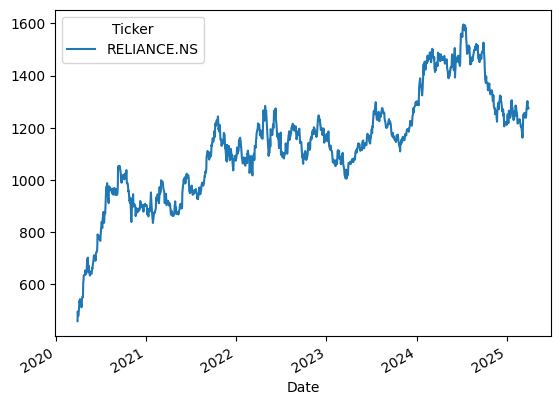

In [5]:
# Plot the closing price 
reliance['Close'].plot()

<Axes: xlabel='Date'>

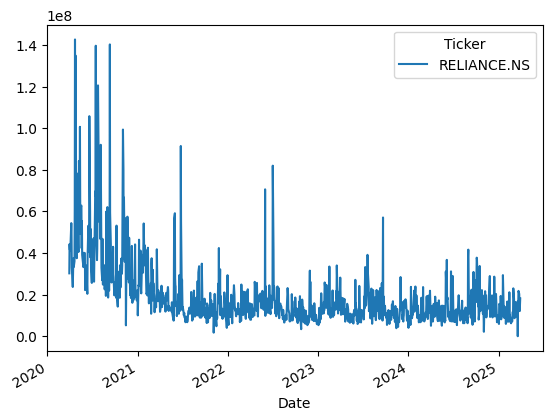

In [6]:
# Plot the volume
reliance['Volume'].plot()

<Axes: xlabel='Date'>

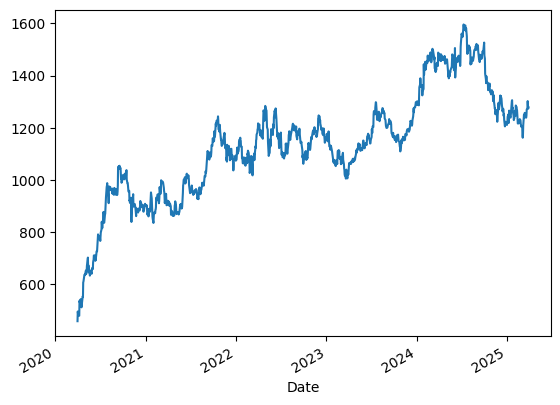

In [7]:
# plot the lag
reliance['lag'] = reliance['Close'].shift(1)
reliance['lag'].plot()

<Axes: xlabel='Date'>

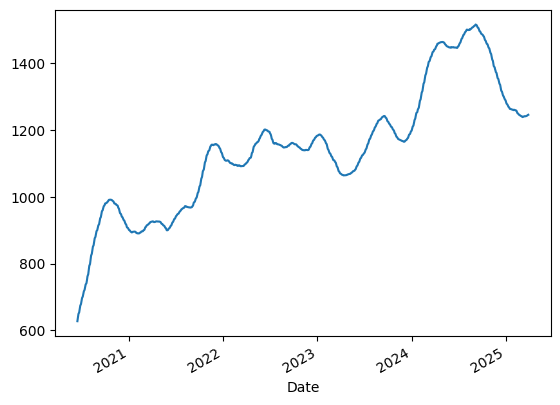

In [8]:
# Create a new column for the moving average
reliance['MA'] = reliance['Close'].rolling(window=50).mean()
reliance['MA'].plot()

<Axes: xlabel='Date'>

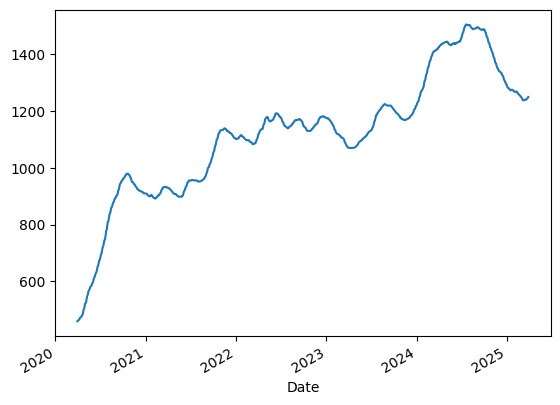

In [9]:
# Create a new column for the exponential moving average
reliance['EMA'] = reliance['Close'].ewm(span=50, adjust=False).mean()
reliance['EMA'].plot()

<Axes: xlabel='Date'>

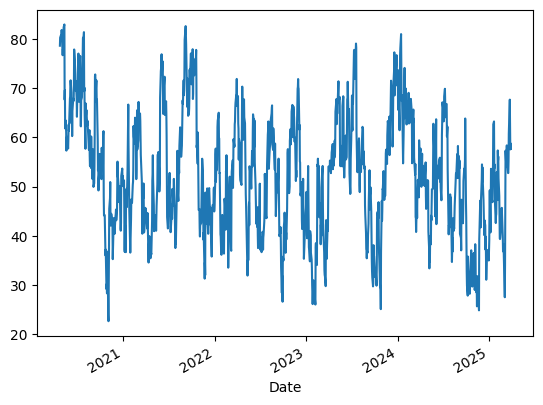

In [10]:
# Create a new column for RSI
reliance['RSI'] = ta.RSI(reliance['Close'].values.flatten(), timeperiod=14)
reliance['RSI'].plot()

<Axes: xlabel='Date'>

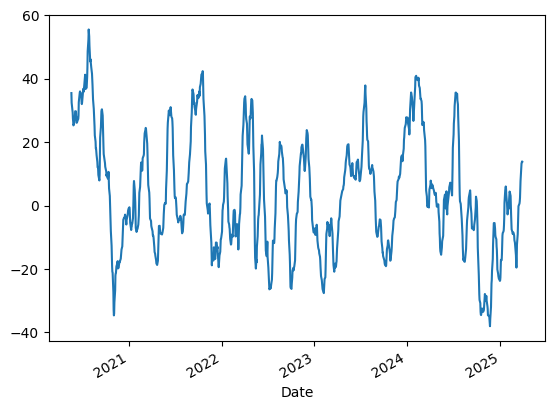

In [11]:
# Create a new column for MACD
macd, macd_signal, macd_hist = ta.MACD(reliance['Close'].values.flatten(), fastperiod=12, slowperiod=26, signalperiod=9)
reliance['MACD'] = macd
reliance['MACD'].plot()

<Axes: xlabel='Date'>

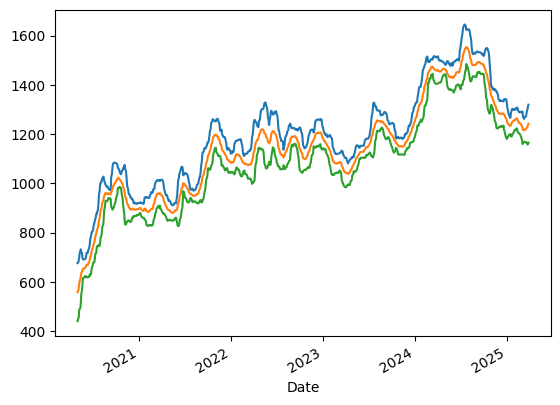

In [12]:
# Create a new column for Bollinger Bands
upperband, middleband, lowerband = ta.BBANDS(reliance['Close'].values.flatten(), timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
reliance['UpperBand'] = upperband
reliance['MiddleBand'] = middleband
reliance['LowerBand'] = lowerband
reliance['UpperBand'].plot()
reliance['MiddleBand'].plot()
reliance['LowerBand'].plot()


In [13]:
# Drop the NaN values
reliance.dropna(inplace=True)

In [14]:
reliance.head()

Price,Close,High,Low,Open,Volume,lag,MA,EMA,RSI,MACD,UpperBand,MiddleBand,LowerBand
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,,,,,,,,
Date,,,,,,,,,,,,,
2020-06-15,726.478210,732.057676,702.427996,704.182844,53107403,714.891785,627.384149,632.166555,67.622759,26.974646,736.585798,678.117905,619.650011
2020-06-16,727.895569,741.776719,713.316919,739.279501,51187003,726.478210,632.755970,635.920634,67.898213,27.360693,742.700487,682.098901,621.497315
2020-06-17,726.838074,735.882187,720.876148,723.643356,41782053,727.895569,637.364052,639.486024,67.437222,27.266991,746.096835,686.743582,627.390329
2020-06-18,745.083862,749.178469,722.451025,723.080983,40471557,726.838074,642.633907,643.627116,71.084978,28.338346,753.035224,691.742603,630.449981
2020-06-19,791.654419,804.883116,747.828615,751.428229,105804173,745.083862,648.861918,649.432108,77.892361,32.569814,770.833286,698.900293,626.967300


In [16]:
# Adjust column names to match the multi-level structure
features = [('Close', 'RELIANCE.NS'), ('RSI', ''), ('MACD', ''), ('UpperBand', ''), ('LowerBand', '')]
target = ('Target', '')

# Ensure there are no NaN values in the features or target
valid_indices = reliance.dropna(subset=features + [target]).index
X = reliance.loc[valid_indices, features]
y = reliance.loc[valid_indices, target]

# Train Linear Regression
lr = LinearRegression()
lr.fit(X, y)
reliance.loc[X.index, ('LinearRegression_Pred', '')] = lr.predict(X)

# Train Logistic Regression
logr = LogisticRegression()
logr.fit(X, y)
reliance.loc[X.index, ('LogisticRegression_Pred', '')] = logr.predict_proba(X)[:, 1]

# Train Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(X, y)
reliance.loc[X.index, ('RandomForest_Pred', '')] = rfr.predict(X)

# Display the updated DataFrame
reliance[[('Close', 'RELIANCE.NS'), ('RSI', ''), ('MACD', ''), ('UpperBand', ''), ('Buy_Signal', ''), ('Sell_Signal', ''), ('PnL', ''), ('LinearRegression_Pred', ''), ('LogisticRegression_Pred', ''), ('RandomForest_Pred', '')]]


Price,Close,RSI,MACD,UpperBand,Buy_Signal,Sell_Signal,PnL,LinearRegression_Pred,LogisticRegression_Pred,RandomForest_Pred
Ticker,RELIANCE.NS,,,,,,,,,
Date,,,,,,,,,,
2020-06-15,726.478210,67.622759,26.974646,736.585798,False,False,0.0,0.575477,0.575340,0.86
2020-06-16,727.895569,67.898213,27.360693,742.700487,False,False,0.0,0.580318,0.580137,0.38
2020-06-17,726.838074,67.437222,27.266991,746.096835,False,False,0.0,0.582771,0.582556,0.86
2020-06-18,745.083862,71.084978,28.338346,753.035224,False,False,0.0,0.587921,0.587602,0.85
2020-06-19,791.654419,77.892361,32.569814,770.833286,False,False,0.0,0.579906,0.579719,0.14
...,...,...,...,...,...,...,...,...,...,...
2025-03-24,1302.099976,67.682938,11.689498,1299.875411,False,False,0.0,0.518683,0.518806,0.18
2025-03-25,1285.449951,61.661602,13.355892,1306.857558,False,False,0.0,0.502221,0.502234,0.09


It seems you are working on a Jupyter Notebook that involves analyzing and modeling financial data for Reliance Industries using machine learning techniques. Here's a summary of the current state:

1. **Data Preparation**:
    - Historical stock data for Reliance Industries has been downloaded using `yfinance`.
    - Various technical indicators like Moving Average (MA), Exponential Moving Average (EMA), Relative Strength Index (RSI), MACD, and Bollinger Bands have been calculated and added to the dataset.

2. **Feature Engineering**:
    - Features such as `Close`, `RSI`, `MACD`, `UpperBand`, and `LowerBand` have been selected for modeling.
    - A target variable (`Target`) has been defined, likely representing buy/sell signals or price movement.

3. **Machine Learning Models**:
    - Three models have been trained: Linear Regression, Logistic Regression, and Random Forest Regressor.
    - Predictions from these models have been added to the dataset as new columns.

4. **Data Cleaning**:
    - NaN values have been dropped to ensure the dataset is clean for modeling and analysis.

5. **Next Steps**:
    - You might want to evaluate the performance of the models (e.g., accuracy, precision, recall, or other metrics).
    - You could also visualize the predictions or use them to simulate trading strategies.

If you need help with any specific task, let me know!